# Occupancy Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv('Occupancy_Data.csv')
df.head(5)

,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.7000,26.272,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.7180,26.290,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.7300,26.230,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.7225,26.125,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.7540,26.200,488.600000,779.000000,0.004767


# Encoding the dataset

In [3]:
# Encode date and time

## Raw data visualisation and statistics

In [4]:
df.describe()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,0.364728,21.433876,25.353937,193.227556,717.906470,0.004027
std,0.481444,1.028024,2.436842,250.210906,292.681718,0.000611
min,0.000000,20.200000,22.100000,0.000000,427.500000,0.003303
25%,0.000000,20.650000,23.260000,0.000000,466.000000,0.003529
50%,0.000000,20.890000,25.000000,0.000000,580.500000,0.003815
75%,1.000000,22.356667,26.856667,442.500000,956.333333,0.004532
max,1.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [5]:
df

,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.700000,26.272000,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.718000,26.290000,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.730000,26.230000,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.722500,26.125000,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...,...
2660,04/02/15 10:38,1,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,04/02/15 10:40,1,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,04/02/15 10:40,1,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,04/02/15 10:41,1,24.356667,25.700000,813.000000,1123.000000,0.004849


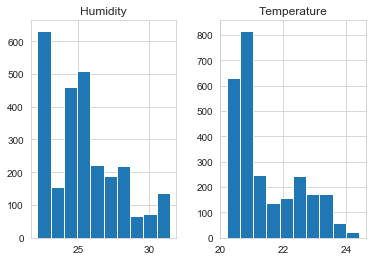

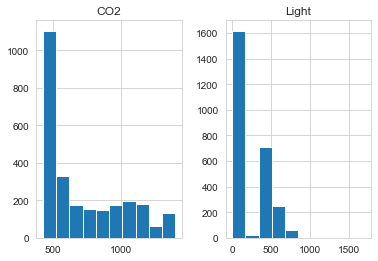

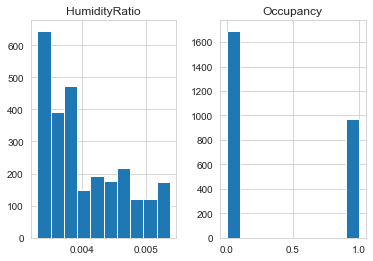

In [6]:
# histogram plots to visualise data distribution
from matplotlib import pyplot
df.hist(column = ['Temperature', 'Humidity'])
df.hist(column = ['CO2','Light'])
df.hist(column = ['HumidityRatio', 'Occupancy'])
pyplot.show()


# #Taking care of missing data

In [7]:
print(df.isnull().sum()) 
print(sum(df.isnull().sum()))

Date Time        0
Occupancy        0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64
0



## Data cleaning Statregy:
<br> No missing data, no out of range data<br> 



## Data visualisation (pre-exploratory)

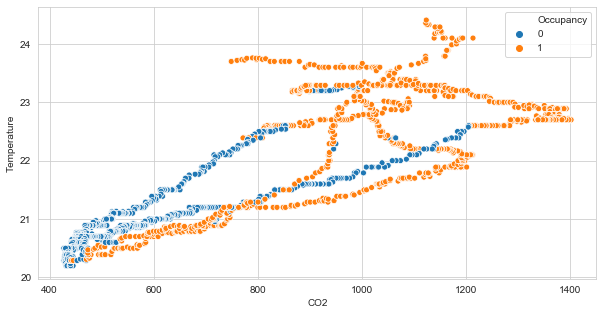

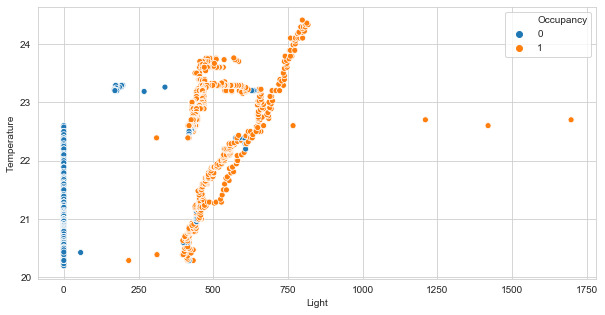

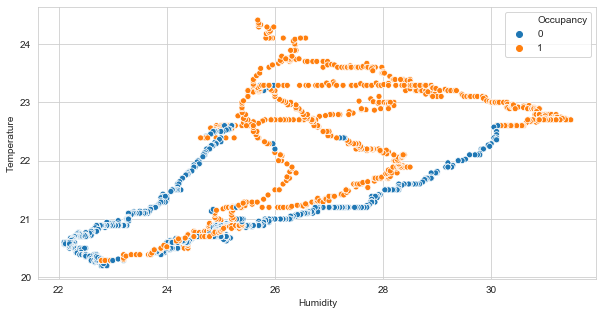

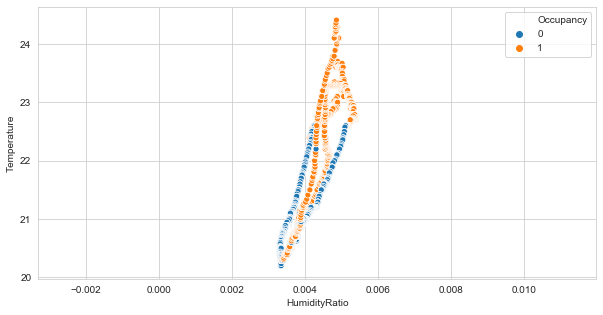

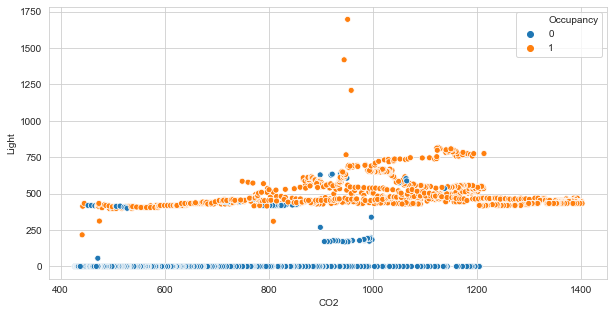

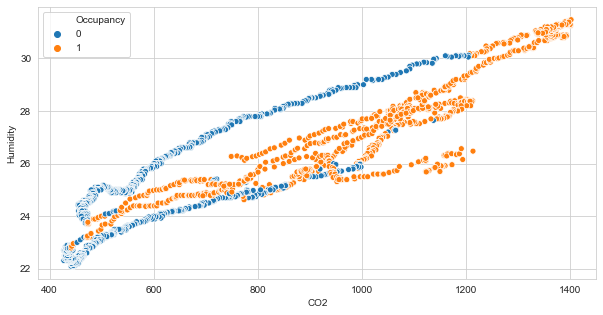

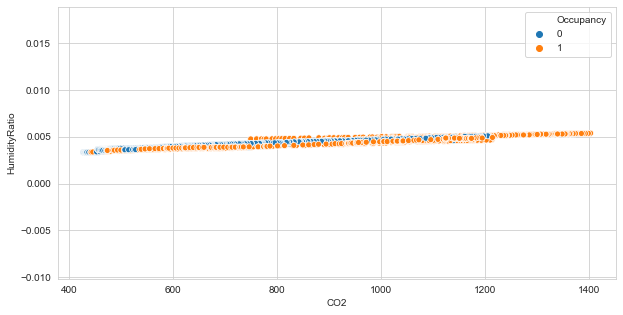

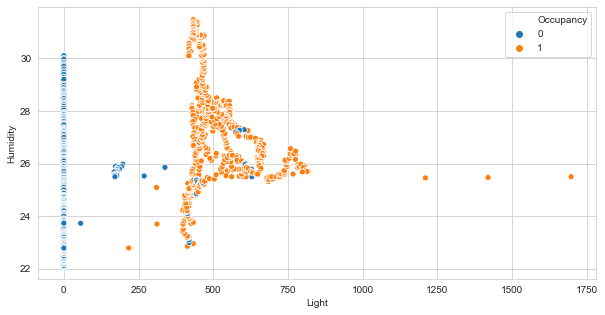

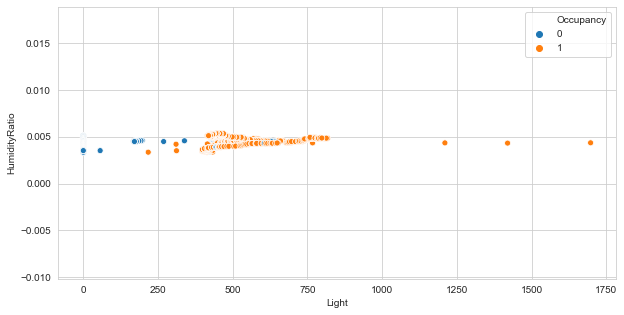

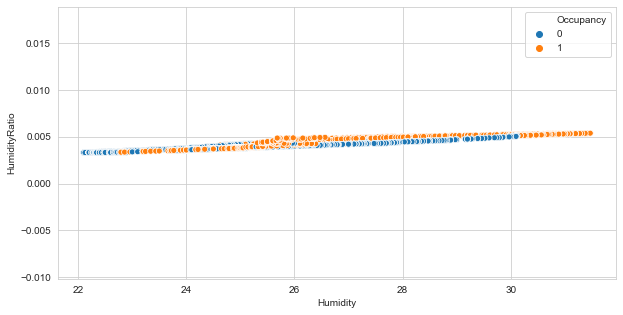

In [8]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, x='CO2', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='Light', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='Humidity', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='Humidity', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()


## Splitting the dataframe in train and test sets

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df.iloc[:,1:], test_size = 0.2, random_state = 0)
print(df_train)


      Occupancy  Temperature   Humidity       Light          CO2  \
1280          1    22.200000  27.790000  538.000000  1166.000000   
1912          0    20.945000  25.790000    0.000000   582.250000   
745           0    20.500000  22.365000    0.000000   441.500000   
145           1    22.700000  25.815000  432.750000   920.250000   
1569          1    22.790000  31.114286  441.285714  1359.500000   
...         ...          ...        ...         ...          ...   
1731          0    21.600000  28.500000    0.000000   911.333333   
763           0    20.500000  22.370000    0.000000   435.200000   
835           0    20.390000  22.500000    0.000000   430.000000   
1653          1    22.600000  30.550000  419.000000  1273.333333   
2607          1    22.823333  25.393333  683.000000   961.666667   

      HumidityRatio  
1280       0.004601  
1912       0.003950  
745        0.003329  
145        0.004404  
1569       0.005345  
...             ...  
1731       0.004548  
763    

In [10]:
print(df_test)

      Occupancy  Temperature  Humidity  Light          CO2  HumidityRatio
1763          0    21.390000   27.7900    0.0   806.666667       0.004377
795           0    20.500000   22.3900    0.0   433.500000       0.003333
2099          0    20.790000   24.9450    0.0   526.000000       0.003783
104           1    23.000000   28.0180  429.0  1061.600000       0.004871
1661          1    22.600000   30.3650  419.0  1240.250000       0.005155
...         ...          ...       ...    ...          ...            ...
2321          0    20.620000   24.4120    0.0   462.600000       0.003663
564           0    20.625000   22.2225    0.0   445.000000       0.003334
2328          0    20.680000   24.4780    0.0   464.600000       0.003687
1109          1    20.873333   24.7750  441.0   694.833333       0.003777
666           0    20.600000   22.2000    0.0   451.600000       0.003325

[533 rows x 6 columns]


## Scaling the train set features 

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_train_scaled= min_max_scaler.fit_transform(df_train)

df_train_scaled= pd.DataFrame(data= df_train_scaled, columns=['Ouccupancy','Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
print(df_train_scaled)
df_test_scaled= min_max_scaler.transform(df_test)
df_test_scaled= pd.DataFrame(data= df_test_scaled, columns=['Ouccupancy','Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
print(df_test_scaled)


      Ouccupancy  Temperature  Humidity     Light       CO2  HumidityRatio
0            1.0     0.475248  0.607095  0.316983  0.757630       0.625397
1            0.0     0.177030  0.393705  0.000000  0.158759       0.311649
2            0.0     0.071287  0.028274  0.000000  0.014363       0.012547
3            1.0     0.594059  0.396372  0.254971  0.505514       0.530693
4            1.0     0.615446  0.961780  0.260000  0.956143       0.984389
...          ...          ...       ...       ...       ...            ...
2127         0.0     0.332673  0.682849  0.000000  0.496367       0.600077
2128         0.0     0.071287  0.028808  0.000000  0.007899       0.012908
2129         0.0     0.045149  0.042678  0.000000  0.002565       0.011301
2130         1.0     0.570297  0.901574  0.246870  0.867744       0.908026
2131         1.0     0.623366  0.351383  0.402416  0.548004       0.511559

[2132 rows x 6 columns]
     Ouccupancy  Temperature  Humidity     Light       CO2  HumidityRatio
0

## Features' Correlation coefficients and heatmap

In [12]:
correlation=df_train_scaled.corr(method='pearson')
print(correlation)

               Ouccupancy  Temperature  Humidity     Light       CO2  \
Ouccupancy       1.000000     0.713070  0.611067  0.926962  0.771128   
Temperature      0.713070     1.000000  0.714242  0.770548  0.869920   
Humidity         0.611067     0.714242  1.000000  0.560238  0.910927   
Light            0.926962     0.770548  0.560238  1.000000  0.769654   
CO2              0.771128     0.869920  0.910927  0.769654  1.000000   
HumidityRatio    0.704326     0.893818  0.951212  0.693837  0.964571   

               HumidityRatio  
Ouccupancy          0.704326  
Temperature         0.893818  
Humidity            0.951212  
Light               0.693837  
CO2                 0.964571  
HumidityRatio       1.000000  


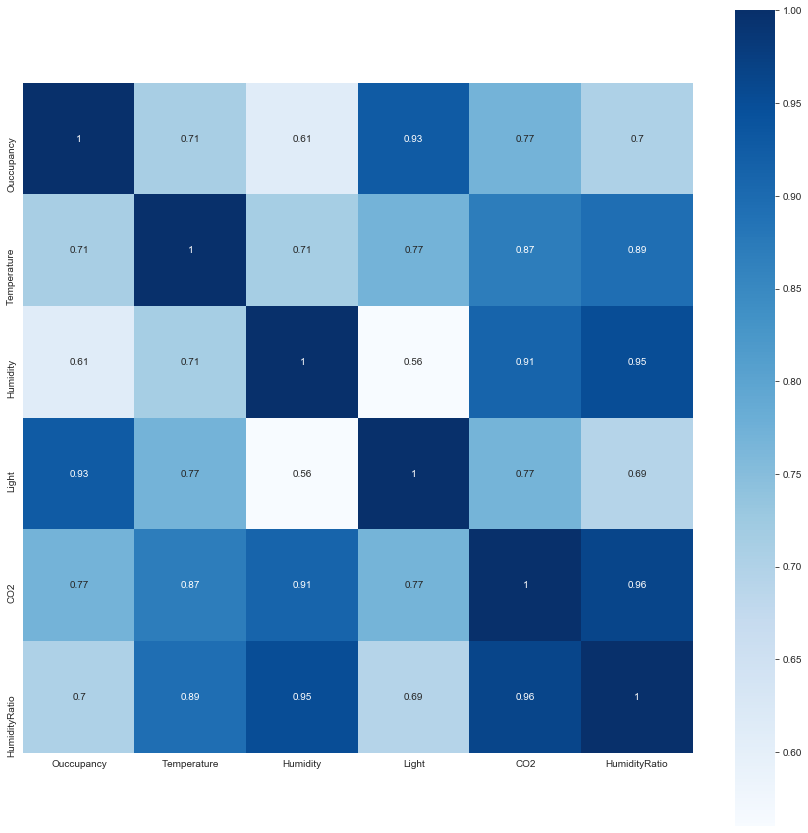

In [13]:
plt.figure(figsize=(15,15))
df_train_corr = df_train_scaled.corr()

sns.heatmap(df_train_scaled.corr(), square=True, annot=True, cmap="Blues");

## Defining independent and dependent variables

In [14]:
X_train=df_train_scaled.iloc[:, 1:]
y_train=df_train_scaled.iloc[:,0]
X_test=df_test_scaled.iloc[:, 1:]
y_test=df_test_scaled.iloc[:,0]

## Training the model


### SVM model

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10,100],'gamma':[0.1, 1, 10] }
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred_SVM_CV = clf.predict(X_test)

print("Using the score funtion:",clf.score(X_test,y_test))
print("The best param is:", clf.best_params_)

cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
accuracy_score(y_test, y_pred_SVM_CV)

Using the score funtion: 0.9793621013133208
The best param is: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
[[338  11]
 [  0 184]]


0.9793621013133208

### Neural network

In [16]:
#Trying Neural Networks (multilayer perceptron)
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test)
        print("*"*20)
#         print(clf_nn.loss_)
        print("loss = %f" %(clf_nn.loss_))



        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))


********************
loss = 0.182326
This is when the layer sizes is: 2,2
[[326  23]
 [ 18 166]]
0.9230769230769231
********************
loss = 0.148653
This is when the layer sizes is: 2,3
[[328  21]
 [ 10 174]]
0.9418386491557224
********************
loss = 0.658746
This is when the layer sizes is: 2,4
[[349   0]
 [184   0]]
0.6547842401500938
********************
loss = 0.065026
This is when the layer sizes is: 2,5
[[337  12]
 [  0 184]]
0.9774859287054409


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


********************
loss = 0.063721
This is when the layer sizes is: 3,2
[[337  12]
 [  1 183]]
0.975609756097561
********************
loss = 0.060803
This is when the layer sizes is: 3,3
[[337  12]
 [  0 184]]
0.9774859287054409
********************
loss = 0.082871
This is when the layer sizes is: 3,4
[[337  12]
 [  1 183]]
0.975609756097561
********************
loss = 0.070400
This is when the layer sizes is: 3,5
[[338  11]
 [  1 183]]
0.9774859287054409
********************
loss = 0.658746
This is when the layer sizes is: 4,2
[[349   0]
 [184   0]]
0.6547842401500938
********************
loss = 0.069027
This is when the layer sizes is: 4,3
[[338  11]
 [  0 184]]
0.9793621013133208
********************
loss = 0.063105
This is when the layer sizes is: 4,4
[[337  12]
 [  0 184]]
0.9774859287054409
********************
loss = 0.168288
This is when the layer sizes is: 4,5
[[324  25]
 [ 12 172]]
0.9305816135084428
********************
loss = 0.149243
This is when the layer sizes is: 5,2


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Random Forest 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV


calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=8))


pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}



search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
y_pred_Pipe = search.predict(X_test)


print("Using the score funtion:",search.score(X_test,y_test))
print("The best param is:", search.best_params_)

cm = confusion_matrix(y_test, y_pred_Pipe)
print(cm)
accuracy_score(y_test, y_pred_Pipe)




Using the score funtion: 0.9831144465290806
The best param is: {'model__base_estimator__max_depth': 6, 'select__k': 2}
[[341   8]
 [  1 183]]


0.9831144465290806

## Dimension reduction

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
X_test_pca

[0.9002037  0.06617451]


array([[ 0.22081423, -0.24306514],
       [-0.60416892,  0.05074952],
       [-0.28509957, -0.10473026],
       ...,
       [-0.3775876 , -0.08377841],
       [-0.13853633,  0.04067948],
       [-0.59541309,  0.07847209]])

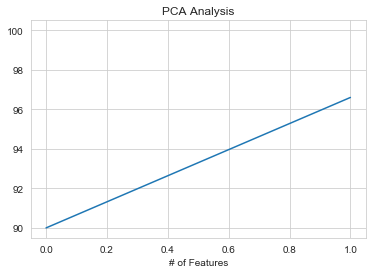

In [19]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] feature
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(89.5,100.5)
plt.style.context('seaborn-whitegrid')
plt.xticks()
plt.plot(var)


In [20]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10,100,1000],'gamma':[0.1, 1, 10] }
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_pca, y_train)
y_pred_SVM_CV = clf.predict(X_test_pca)

print("Using the score funtion:",clf.score(X_test_pca,y_test))
print("The best param is:", clf.best_params_)

cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
accuracy_score(y_test, y_pred_SVM_CV)

Using the score funtion: 0.9643527204502814
The best param is: {'C': 1000, 'gamma': 10, 'kernel': 'rbf'}
[[342   7]
 [ 12 172]]


0.9643527204502814

In [21]:
calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=5))


pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}



search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train_pca, y_train)
y_pred_Pipe = search.predict(X_test_pca)


print("Using the score funtion:",search.score(X_test_pca,y_test))
print("The best param is:", search.best_params_)

cm = confusion_matrix(y_test, y_pred_Pipe)
print(cm)
accuracy_score(y_test, y_pred_Pipe)

Using the score funtion: 0.9643527204502814
The best param is: {'model__base_estimator__max_depth': 8, 'select__k': 2}
[[340   9]
 [ 10 174]]


0.9643527204502814

In [22]:
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train_pca, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test_pca)
        print(clf_nn.loss_)


        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))



0.6587456694228991
This is when the layer sizes is: 2,2
[[349   0]
 [184   0]]
0.6547842401500938
0.6587456652347259
This is when the layer sizes is: 2,3
[[349   0]
 [184   0]]
0.6547842401500938
0.6587456709329645
This is when the layer sizes is: 2,4
[[349   0]
 [184   0]]
0.6547842401500938
0.6587456753781072
This is when the layer sizes is: 2,5
[[349   0]
 [184   0]]
0.6547842401500938
0.6428643591323164
This is when the layer sizes is: 3,2
[[274  75]
 [ 21 163]]
0.8198874296435272
0.1655452928647338
This is when the layer sizes is: 3,3
[[325  24]
 [ 14 170]]
0.9287054409005628
0.2181585959088569
This is when the layer sizes is: 3,4
[[318  31]
 [ 15 169]]
0.9136960600375235
0.2070279762017625
This is when the layer sizes is: 3,5
[[308  41]
 [ 10 174]]
0.9043151969981238
0.17397051897586188
This is when the layer sizes is: 4,2
[[325  24]
 [ 22 162]]
0.9136960600375235
0.25315925870525546
This is when the layer sizes is: 4,3
[[324  25]
 [ 40 144]]
0.8780487804878049
0.1507232480807920

/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.1394681133515128
This is when the layer sizes is: 4,5
[[324  25]
 [ 14 170]]
0.926829268292683


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.1637552929389731
This is when the layer sizes is: 5,2
[[326  23]
 [ 14 170]]
0.9305816135084428
0.1634599423028593
This is when the layer sizes is: 5,3
[[313  36]
 [  9 175]]
0.9155722326454033
0.22965127408635042
This is when the layer sizes is: 5,4
[[308  41]
 [ 15 169]]
0.8949343339587242
0.1557987760718023
This is when the layer sizes is: 5,5
[[324  25]
 [ 12 172]]
0.9305816135084428
the best score was when the layer size was: 4,4 with a score of 0.938086


## Result visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


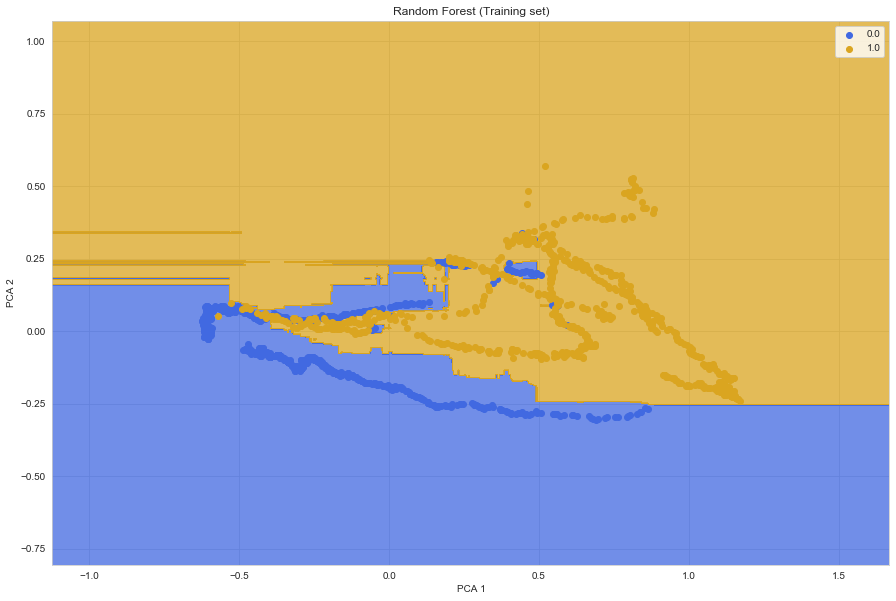

In [23]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15, 10))
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - .5, stop = X_set[:, 0].max() + .5, step = 0.002),
                     np.arange(start = X_set[:, 1].min() - .5, stop = X_set[:, 1].max() + .5, step = 0.002))
plt.contourf(X1, X2, search.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('royalblue', 'goldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('royalblue', 'goldenrod'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


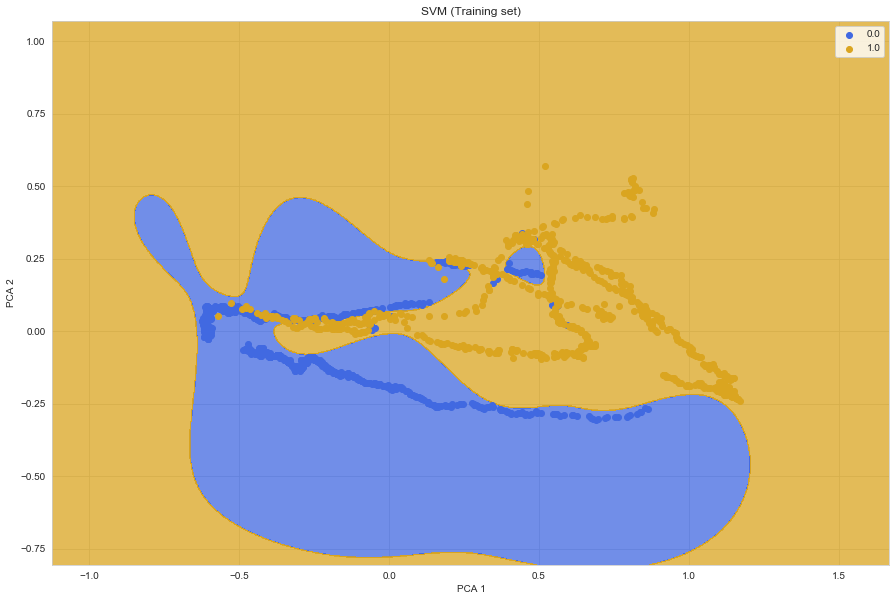

In [24]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15, 10))
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - .5, stop = X_set[:, 0].max() + .5, step = 0.002),
                     np.arange(start = X_set[:, 1].min() - .5, stop = X_set[:, 1].max() + .5, step = 0.002))
plt.contourf(X1, X2, clf.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('royalblue', 'goldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('royalblue', 'goldenrod'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


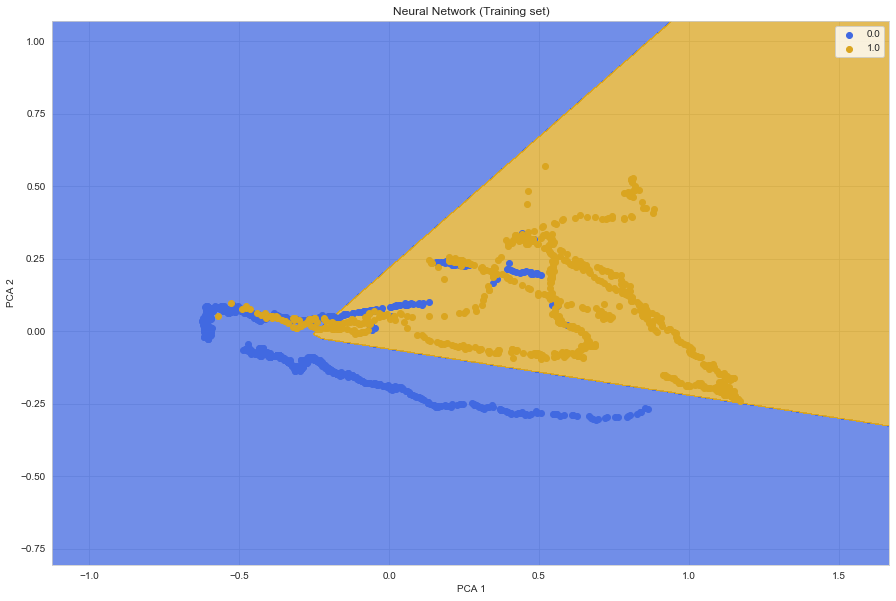

In [25]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(15, 10))
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - .5, stop = X_set[:, 0].max() + .5, step = 0.002),
                     np.arange(start = X_set[:, 1].min() - .5, stop = X_set[:, 1].max() + .5, step = 0.002))
plt.contourf(X1, X2, clf_nn.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('royalblue', 'goldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('royalblue', 'goldenrod'))(i), label = j)
plt.title('Neural Network (Training set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [26]:
h = .002
x_min, x_max = X_train_pca[:, 0:].min() - .002, X_train_pca[:, 0:].max() + .002
y_min, y_max = y_train.min() - .002, y_train.max() + .002
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

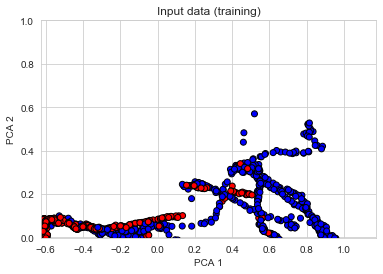

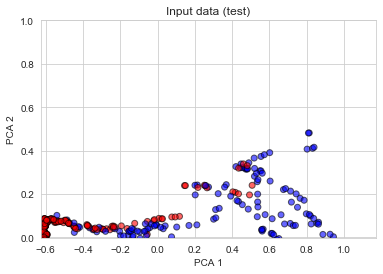

In [27]:
# just plot the dataset first
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.title("Input data (training)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()
# Plot the testing points
plt.title("Input data (test)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

                                       

### Random Forest

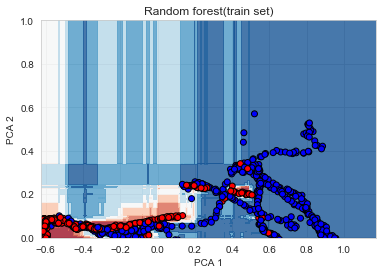

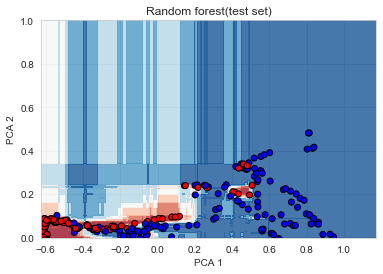

In [28]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(search, "decision_function"):
 Z = search.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = search.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
plt.title("Random forest(train set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
# Plot the testing points
plt.title("Random forest(test set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
if hasattr(search, "decision_function"):
 Z = search.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = search.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### SVM visualisation

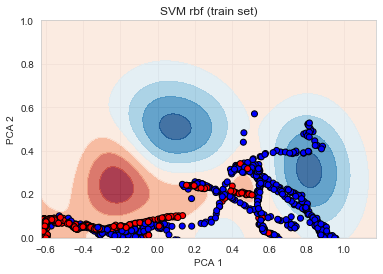

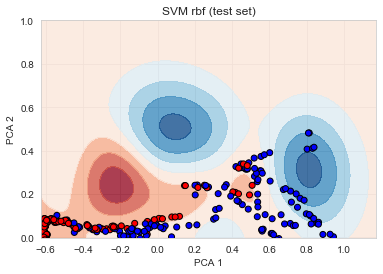

In [29]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
 Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.title("SVM rbf (train set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Plot the testing points

if hasattr(clf, "decision_function"):
 Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
plt.title("SVM rbf (test set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



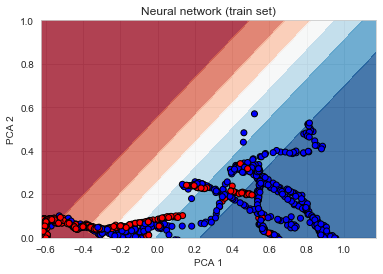

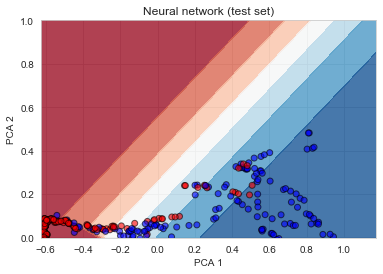

In [30]:
if hasattr(clf_nn, "decision_function"):
 Z = clf_nn.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = clf_nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.title("Neural network (train set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Plot the test points
if hasattr(clf_nn, "decision_function"):
 Z = clf_nn.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
 Z = clf_nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
plt.title("Neural network (test set)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
#x_total = []
#y_total = []
#for i in range(len(X_train_pca)):
   # x_total.append(X_train_pca[i])
    #y_total.append(y_train[i])
#x_total=X_train_pca + X_test_pca
#y_total=[]
#x_total.append(X_train_pca)
#x_total.append(X_test_pca)
#y_total=y_train + y_test
#y_total.append(y_train)
#y_total.append(y_test)
# Plot the training points
# Plot the testing points

        


